In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
import kala

import networkx as nx
import pandas as pd
import numpy as np

from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
from helper_functions import helper_diagonal_sbm
from main_functions import stability_analysis

## How does the number of savers evolve with respect to different parameters (eta_hat, eta_hat_hat)?

### We first start by setting up the constant parameters

In [20]:
## These are the constants not refering to the interactions

num_players = 50
num_steps = 200
num_simulations = 3

# number of initial proportion of savers
threshold = 0.5

In [21]:
## These are the constants refering to the interactions

# Number of games that players save in their memory
memory_length = 4
# Memory rule
update_rule = kala.models.memory_rules.AllPastMemoryRule()

# Standard deviation of log normal distribution
def standard_deviation(eta):
    return eta**2


In [22]:
## This is the network that we are going to use

# SBM network
g, pos = helper_diagonal_sbm(num_players, p_off=0.1)

# Scale-free network
#m = np.random.randint(1, num_players)
#g = nx.barabasi_albert_graph(num_players, m)

In [23]:
## These are the parameters for the linear space we are analysing
##    and for the stability analysis.

start = 0.01
end = 0.99
steps_linspace = 20

timewindow_stability = int(np.floor(num_steps/2))
window = 10

100%|██████████| 3/3 [08:20<00:00, 166.77s/it]


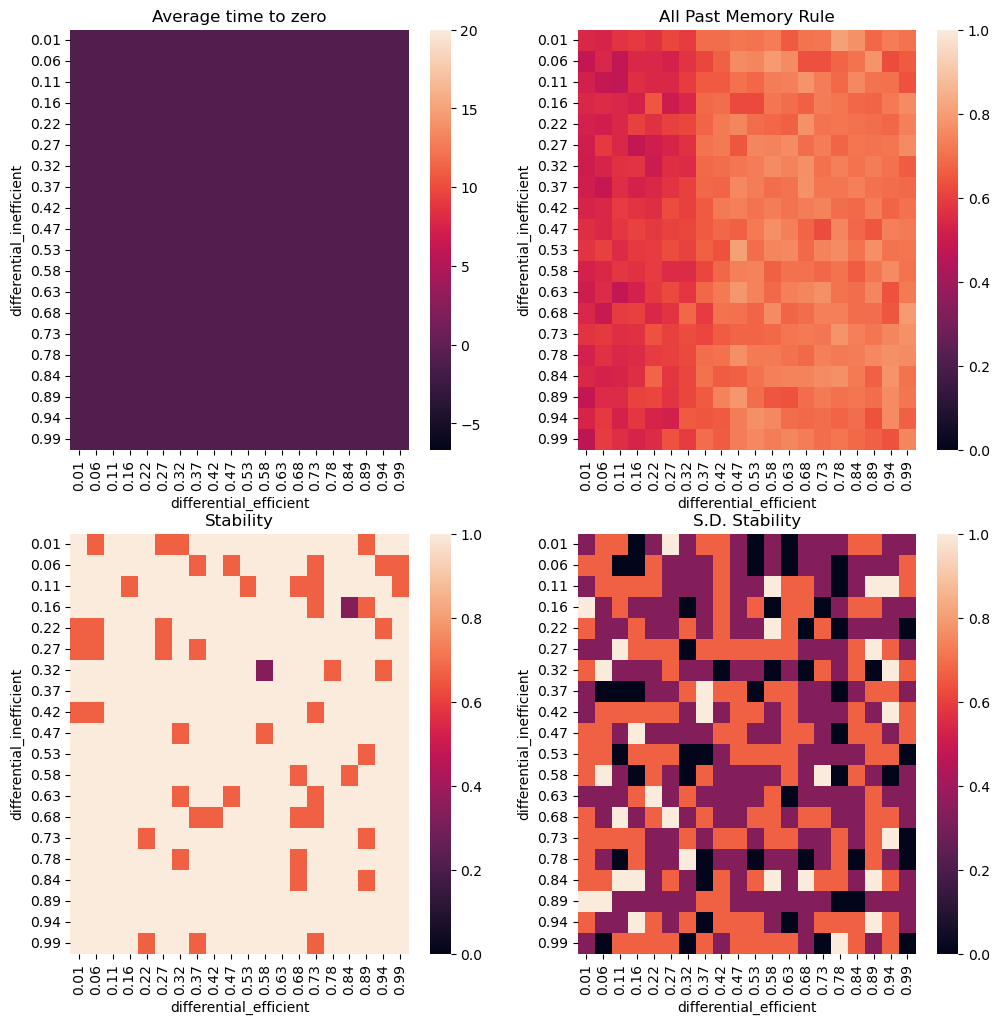

In [24]:
stability_analysis(
    g,
    num_simulations,
    num_steps,
    num_players,
    threshold,
    standard_deviation,
    memory_length,
    update_rule,
    start,
    end,
    steps_linspace,
    timewindow_stability,
    window,
    )